In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('used car data with other.csv')

In [11]:
df.columns

Index(['price', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer',
       'transmission', 'drive', 'size', 'type', 'age'],
      dtype='object')

In [4]:
df.head()

,price,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,size,type,age
0,9500,chrysler,excellent,6 cylinders,gas,30376.0,automatic,fwd,mid-size,mini-van,18.0
1,18250,toyota,good,6 cylinders,gas,201300.0,manual,4wd,full-size,offroad,13.0
2,6800,other,excellent,6 cylinders,diesel,180000.0,automatic,rwd,full-size,bus,16.0
3,2500,other,good,6 cylinders,gas,47000.0,manual,rwd,full-size,pickup,55.0
4,4000,jeep,good,6 cylinders,gas,281000.0,automatic,rwd,mid-size,SUV,15.0


### Prepare the dataset

In [12]:
from sklearn.preprocessing import LabelEncoder

cat_columns = ['manufacturer', 'condition', 'cylinders', 'fuel', 'transmission', 'drive', 'size', 'type']

le = {}

for col in cat_columns:
    if col in df.columns:
        le[col] = LabelEncoder()
        le[col].fit(list(df[col].astype(str).values))
        df[col] = le[col].transform(list(df[col].astype(str).values))

I used the label encoder rather than dummy to get simpler model with the least features in the model, cause in the data the categorical column ratio is 8 out of 10. I can also use dummy with the same result, but its increase the computational cost.

In [6]:
df.head()

,price,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,size,type,age
0,9500,8,0,5,2,30376.0,0,1,2,5,18.0
1,18250,39,2,5,2,201300.0,1,0,1,6,13.0
2,6800,31,0,5,0,180000.0,0,2,1,1,16.0
3,2500,31,2,5,2,47000.0,1,2,1,8,55.0
4,4000,19,2,5,2,281000.0,0,2,2,0,15.0


In [13]:
y = df['price']
X = df.drop(columns='price')

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Compare the regression models

I compare some regression algorithm to get the basic idea of the idea of how is the model behave on the default parameters on the algorithms. here I choose the top 3 algorithms

In [ ]:
def model_selection(X_train, y_train, X_test, y_test, models):
    
    from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, r2_score
    
    R2_result = []
    MSE_result = []
    str_models = []
    
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        MSE = mean_squared_error(y_test, y_pred)
        R2 = r2_score(y_test, y_pred)       
        R2_result.append(R2)
        MSE_result.append(MSE)  
        str_models.append(str(model))
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

    ax1.plot(R2_result)
    ax1.set_ylabel('R2_score')


    ax2.plot(str_models,np.sqrt(MSE_result))
    ax2.set_ylabel('RMSE_result')
    ax2.set_xticklabels(str_models, rotation=90)
    plt.tight_layout()
    
    return pd.DataFrame({'models':models, 'R2':R2_result, 'RMSE':np.sqrt(MSE_result)}) 

https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
https://github.com/justmarkham/scikit-learn-videos/blob/master/08_grid_search.ipynb

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

,models,R2,RMSE
0,LinearRegression(),0.204244,8008.263122
1,Ridge(),0.204246,8008.256016
2,Lasso(),0.204286,8008.052592
3,BayesianRidge(),0.204284,8008.062836
4,SVR(),0.001867,8968.972933
5,KNeighborsRegressor(),0.705696,4870.194552
6,DecisionTreeRegressor(),0.602034,5663.325346
7,"(DecisionTreeRegressor(random_state=54351094),...",0.753165,4460.172915
8,"(DecisionTreeRegressor(max_features='auto', ra...",0.775639,4252.281842
9,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.198091,8039.168641


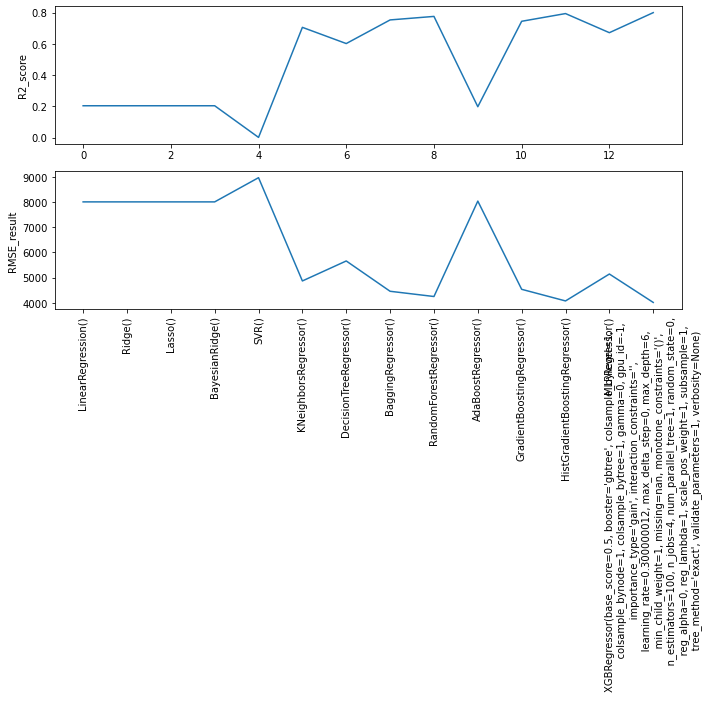

In [30]:
models = [LinearRegression(), Ridge(), Lasso(), BayesianRidge(), SVR(), KNeighborsRegressor(),
          DecisionTreeRegressor(), BaggingRegressor(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(),
          HistGradientBoostingRegressor(), MLPRegressor(), XGBRegressor()]

model_selection(X_train, y_train, X_test, y_test, models)   

### Cross Validation for the best model in model comparasion

In [25]:
def acc_CV(model, X, y):
    from sklearn.model_selection import cross_val_score

    accuracies = cross_val_score(estimator = model, X= X, y=y,  cv=10)
    accuracies.mean()
    accuracies.std()
    print('akurasi  {:.2f}% +/- {:.2f}%' .format(accuracies.mean()*100, accuracies.std()*100))

In [17]:
rf = RandomForestRegressor()
HGB = HistGradientBoostingRegressor()
XGB = XGBRegressor()

In [16]:
acc_CV(rf, X_train, y_train)

akurasi  77.36% +/- 1.02%


In [35]:
acc_CV(HGB, X_train, y_train)

akurasi  79.11% +/- 1.04%


In [33]:
acc_CV(XGB, X_train, y_train)

akurasi  79.43% +/- 1.05%


## Random Forest model

### Feature importances in the model

Text(0.5, 1.0, 'Feature Importances')

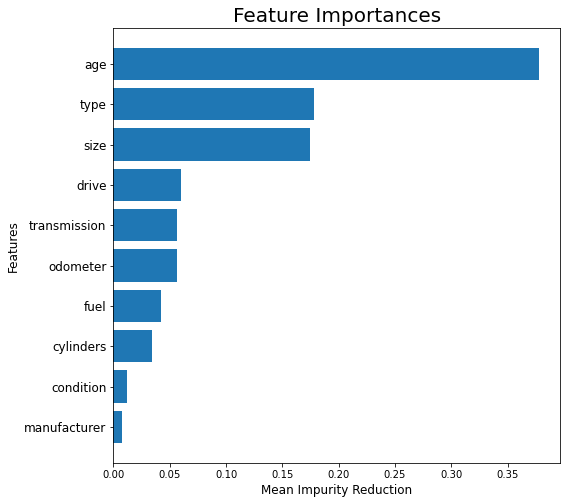

In [38]:
tree_feature =  pd.Series(rf.feature_importances_, df.drop(columns='price').columns).sort_values(ascending = True)
plt.figure(figsize = (8,8))
plt.barh(df.drop(columns='price').columns, tree_feature)
plt.xlabel('Mean Impurity Reduction', fontsize = 12)
plt.ylabel('Features', fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Feature Importances', fontsize = 20)

### Iterate the process

Iterate the process of the designing the features of the data to get more accuracy in the model

https://medium.com/purwadhikaconnect/metode-feature-importance-dalam-data-science-yang-perlu-kamu-ketahui-6b4f35db6476

### Tuning using GridSearchCV per parameters

In [1]:
def tuning_param(X, y, model, parameters):
    
    from sklearn.model_selection import GridSearchCV   
        
    scores = []
   
    fig, axs = plt.subplots(len(parameters))
    k = 0   
    for parameter in parameters:
        
        clf = GridSearchCV(estimator = model, param_grid = parameter, cv=3, scoring='r2', n_jobs=-1)
        clf.fit(X, y)
        

        for name_param, val_param in parameter.items():
            
            grid_mean_scores = clf.cv_results_['mean_test_score']

            if len(parameters) == 1:
               axs.plot(val_param, grid_mean_scores)
               axs.set_xlabel(name_param)
               axs.set_ylabel('R2') 
            
            else:
                axs[k].plot(val_param, grid_mean_scores)
                axs[k].set_xlabel(name_param)
                axs[k].set_ylabel('R2')
                
                k+=1
            
            
        scores.append({'parameter':name_param,
                       'best_R2':clf.best_score_,
                       'best_value':clf.best_params_})
            
    plt.tight_layout()       
    return pd.DataFrame(scores, columns=['parameter', 'best_R2', 'best_value'])

In [ ]:
parameters = [{'n_estimators': np.arange(100, 200, 10)}, {'max_features':['auto', 'sqrt']}, 
              {'max_depth':np.arange(10,250, 10)}, {'min_samples_split':np.arange(1, 5, 1)}, 
             {'min_samples_leaf':np.arange(1,5,1)}]
tuning_param(X_train, y_train, rf, parameters)

it can calculate in one time using those code above, but because computational reason here i am using one parameter for one code.

,parameter,best_R2,best_value
0,n_estimators,0.767367,{'n_estimators': 450}


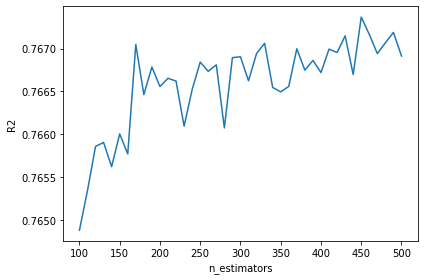

In [24]:
tuning_param(X_train, y_train, rf, [{'n_estimators': np.arange(100, 510, 10)}])

,parameter,best_R2,best_value
0,n_estimators,0.767489,{'n_estimators': 740}


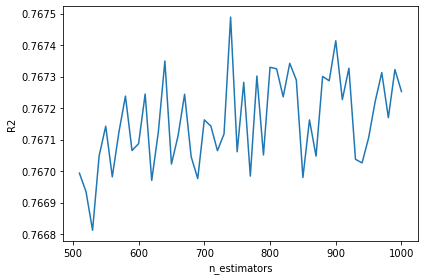

In [34]:
tuning_param(X_train, y_train, rf, [{'n_estimators': np.arange(510, 1010, 10)}])

,parameter,best_R2,best_value
0,min_samples_split,0.770455,{'min_samples_split': 11}


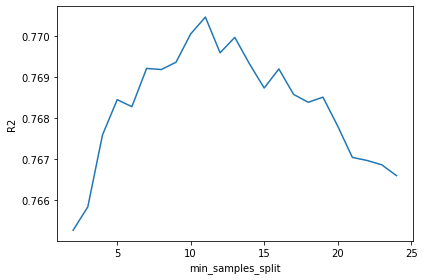

In [31]:
tuning_param(X_train, y_train, rf, [{'min_samples_split':np.arange(1, 25, 1)}])

,parameter,best_R2,best_value
0,min_samples_leaf,0.767345,{'min_samples_leaf': 3}


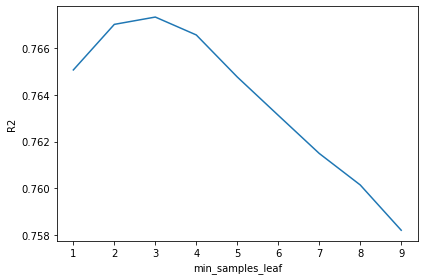

In [32]:
tuning_param(X_train, y_train, rf, [{'min_samples_leaf':np.arange(1, 10, 1)}])

,parameter,best_R2,best_value
0,max_depth,0.766404,{'max_depth': 170}


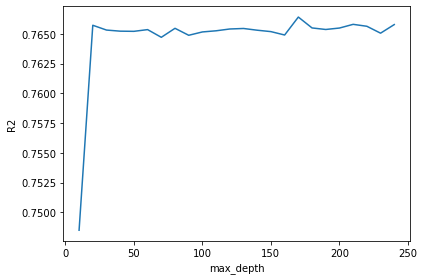

In [33]:
tuning_param(X_train, y_train, rf, [{'max_depth':np.arange(10,250, 10)}])

,parameter,best_R2,best_value
0,max_features,0.777653,{'max_features': 'sqrt'}


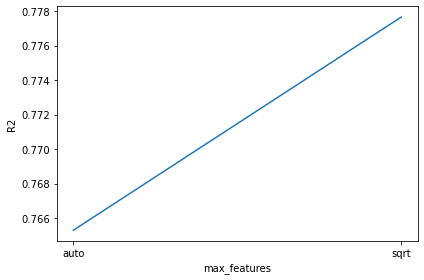

In [11]:
tuning_param(X_train, y_train, rf, [{'max_features':['auto', 'sqrt']}])

From the tuning_param function we can see the effect of the parameters change to R2 performance and the parameters result can be the value range for the hyperparameter tuning using RandomizedsearchCV. 

### Hyperparameter using RandomizedsearchCV

In [9]:
def model_randomCV(X, y, model, parameters):
    
    from sklearn.model_selection import RandomizedSearchCV
    
    randCV = RandomizedSearchCV(estimator=model, param_distributions=parameters, n_jobs=-1, cv=5)
    
    randCV.fit(X, y)
   
    print('best_parameters: ' + str(randCV.best_params_))
    print('best_score: ' + str(randCV.best_score_))
    print('best_estimator: ' + str(randCV.best_estimator_))    
    
    return pd.DataFrame(randCV.cv_results_).sort_values(by='rank_test_score')

In [17]:
parameters = {'n_estimators': np.arange(150, 260, 10), 'max_features':['auto', 'sqrt'], 'max_depth':np.arange(100,210, 10), 
             'min_samples_split':np.arange(8, 15, 1), 'min_samples_leaf':np.arange(1,6,1)}

model_randomCV(X_train, y_train, rf, parameters)

best_parameters: {'n_estimators': 190, 'min_samples_split': 13, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 190}
best_score: 0.7815388659752746
best_estimator: RandomForestRegressor(max_depth=190, max_features='sqrt', min_samples_split=13,
                      n_estimators=190)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,23.428801,0.494140,1.102002,0.059244,190,13,1,sqrt,190,"{'n_estimators': 190, 'min_samples_split': 13,...",0.781238,0.791067,0.777767,0.772742,0.784880,0.781539,0.006223,1
4,18.548200,0.369261,0.863801,0.080457,150,10,2,sqrt,140,"{'n_estimators': 150, 'min_samples_split': 10,...",0.779263,0.789218,0.773730,0.770166,0.782614,0.778999,0.006684,2
8,24.294000,0.162987,1.030401,0.024433,210,12,3,sqrt,200,"{'n_estimators': 210, 'min_samples_split': 12,...",0.775296,0.786486,0.771299,0.767708,0.779601,0.776078,0.006546,3
0,62.529999,0.570965,1.178404,0.071815,190,9,1,auto,180,"{'n_estimators': 190, 'min_samples_split': 9, ...",0.773905,0.785781,0.773835,0.765858,0.779732,0.775822,0.006654,4
5,20.619599,0.094696,0.880201,0.033415,180,13,3,sqrt,190,"{'n_estimators': 180, 'min_samples_split': 13,...",0.774034,0.786106,0.770837,0.767349,0.779708,0.775607,0.006641,5
7,28.772801,0.164034,1.241003,0.018187,250,10,4,sqrt,140,"{'n_estimators': 250, 'min_samples_split': 10,...",0.773570,0.784428,0.769221,0.765435,0.777214,0.773974,0.006564,6
6,58.896398,0.337390,1.057805,0.025547,190,8,4,auto,100,"{'n_estimators': 190, 'min_samples_split': 8, ...",0.770839,0.782154,0.768106,0.760745,0.776598,0.771689,0.007307,7
9,74.100013,6.579778,1.270603,0.215764,250,9,4,auto,190,"{'n_estimators': 250, 'min_samples_split': 9, ...",0.770267,0.782652,0.767723,0.760705,0.775699,0.771409,0.007406,8
2,44.589598,0.242269,0.760804,0.004832,150,9,5,auto,160,"{'n_estimators': 150, 'min_samples_split': 9, ...",0.768447,0.780288,0.766362,0.759328,0.774844,0.769854,0.007194,9
3,56.840200,0.539129,0.980603,0.041285,190,11,5,auto,170,"{'n_estimators': 190, 'min_samples_split': 11,...",0.768626,0.780577,0.766664,0.758980,0.774122,0.769794,0.007254,10


the performance using hyperparameter tuning increase from 0.775 to 0.781, even its not big change but still its the performance progress. but before using it in the final model, we should check the underfitting and overfitting from model to get the confidence that the model is works for the unknown data / unseen samples 

### underfit and overfit check

1. Overfitting is when the model’s error on the training set (i.e. during training) is very low but then, the model’s error on the test set (i.e. unseen samples) is large!

2. Underfitting is when the model’s error on both the training and test sets (i.e. during training and testing) is very high.

https://towardsdatascience.com/is-your-model-overfitting-or-maybe-underfitting-an-example-using-a-neural-network-in-python-4faf155398d2

In [10]:
def fit_check(model, kfolds):
    
    from sklearn.model_selection import KFold
    from sklearn.metrics import mean_squared_error
    
    kf = KFold(n_splits=kfolds)
    list_training_error = []
    list_testing_error = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_train_data_pred = model.predict(X_train)
        y_test_data_pred = model.predict(X_test)
        fold_training_error = np.sqrt(mean_squared_error(y_train, y_train_data_pred)) 
        fold_testing_error = np.sqrt(mean_squared_error(y_test, y_test_data_pred))
        list_training_error.append(fold_training_error)
        list_testing_error.append(fold_testing_error)
    
    figsize=(5,5)
    plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-', label = 'training')
    plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-', label = 'testing')
    plt.xlabel('number of fold')
    plt.ylabel('RMSE')
    plt.title('RMSE across folds')
    plt.legend()
    plt.tight_layout()
    plt.show()

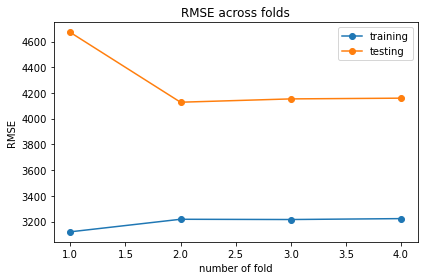

In [26]:
rf_best = RandomForestRegressor(max_depth=190, max_features='sqrt', min_samples_split=13, n_estimators=190)

fit_check(rf_best, 5)

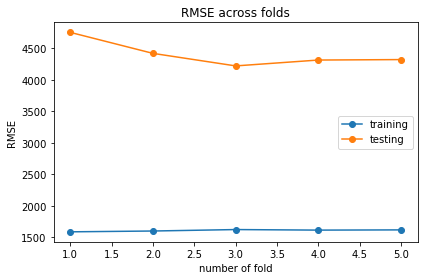

In [15]:
fit_check(rf, 5)

Based on the underfitting and overfitting result, we can see the Random Forest with Hyperparameter tuning perform better from Random Forest default with the better R2 also. but the error difference still high which is 1000 for the price. so we should check another model to get the comparison.

## HGB model

### overfitting and underfitting check

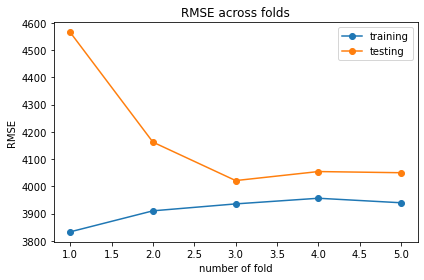

In [57]:
fit_check(HGB, 5)

### Tuning parameters

,parameter,best_R2,best_value
0,learning_rate,0.793036,{'learning_rate': 0.2}


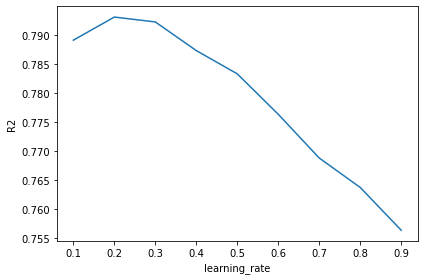

In [61]:
tuning_param(X_train, y_train, HGB, [{'learning_rate':np.arange(0.1, 1, 0.1)}])

,parameter,best_R2,best_value
0,max_leaf_nodes,0.798185,{'max_leaf_nodes': 109}


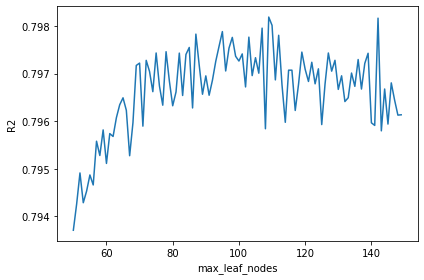

In [65]:
tuning_param(X_train, y_train, HGB, [{'max_leaf_nodes':np.arange(50, 150, 1)}])

,parameter,best_R2,best_value
0,max_iter,0.798284,{'max_iter': 530}


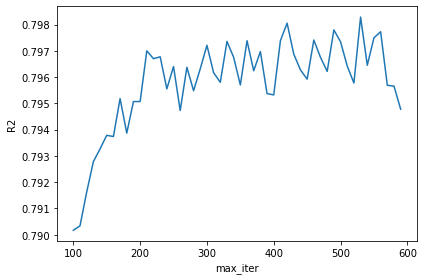

In [18]:
tuning_param(X_train, y_train, HGB, [{'max_iter': np.arange(100, 600, 10)}])

,parameter,best_R2,best_value
0,max_depth,0.790495,{'max_depth': 100}


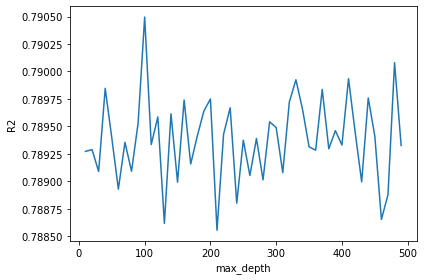

In [13]:
tuning_param(X_train, y_train, HGB, [{'max_depth': np.arange(0, 500, 10)}])

,parameter,best_R2,best_value
0,min_samples_leaf,0.789906,{'min_samples_leaf': 30}


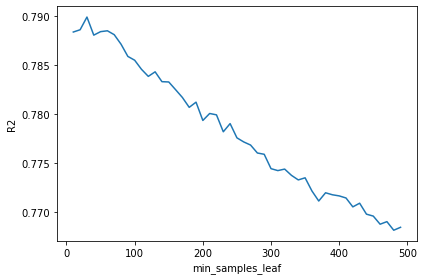

In [15]:
tuning_param(X_train, y_train, HGB, [{'min_samples_leaf': np.arange(0, 500, 10)}])

,parameter,best_R2,best_value
0,l2_regularization,0.78871,{'l2_regularization': 0}


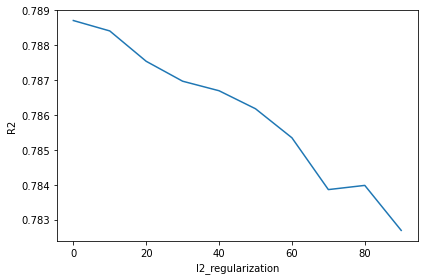

In [19]:
tuning_param(X_train, y_train, HGB, [{'l2_regularization': np.arange(0, 100, 10)}])

### Hyperparameter using RandomizedsearchCV 

In [11]:
parameters = {'learning_rate':np.arange(0.1, 0.4, 0.1), 'max_leaf_nodes':np.arange(100, 150, 10), 'max_iter': np.arange(200, 400, 10), 
             'max_depth': np.arange(50, 150, 10), 'min_samples_leaf':np.arange(0,50,10)}

model_randomCV(X_train, y_train, HGB, parameters)

best_parameters: {'min_samples_leaf': 40, 'max_leaf_nodes': 120, 'max_iter': 300, 'max_depth': 140, 'learning_rate': 0.1}
best_score: 0.8003662621122644
best_estimator: HistGradientBoostingRegressor(max_depth=140, max_iter=300, max_leaf_nodes=120,
                              min_samples_leaf=40)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_leaf_nodes,param_max_iter,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,18.409601,2.732962,0.571400,0.103879,40,120,300,140,0.1,"{'min_samples_leaf': 40, 'max_leaf_nodes': 120...",0.806356,0.807813,0.795728,0.789813,0.802122,0.800366,0.006743,1
1,26.327087,1.756297,0.710400,0.291530,20,130,350,110,0.1,"{'min_samples_leaf': 20, 'max_leaf_nodes': 130...",0.804581,0.807409,0.795607,0.790638,0.801048,0.799856,0.006063,2
3,11.929198,2.292821,0.382402,0.086250,20,140,330,50,0.2,"{'min_samples_leaf': 20, 'max_leaf_nodes': 140...",0.801900,0.803606,0.793447,0.786799,0.799338,0.797018,0.006161,3
7,14.884601,1.897614,0.461601,0.070398,40,140,250,90,0.2,"{'min_samples_leaf': 40, 'max_leaf_nodes': 140...",0.800931,0.801273,0.790690,0.786669,0.798757,0.795664,0.005906,4
8,9.780000,1.676749,0.320802,0.018301,20,140,330,90,0.3,"{'min_samples_leaf': 20, 'max_leaf_nodes': 140...",0.798639,0.800680,0.789697,0.780965,0.793607,0.792718,0.007022,5
6,7.885001,2.381248,0.259600,0.064797,30,100,260,80,0.4,"{'min_samples_leaf': 30, 'max_leaf_nodes': 100...",0.792594,0.793698,0.783236,0.777834,0.793292,0.788131,0.006443,6
5,8.101402,1.469065,0.201000,0.096691,20,140,280,60,0.4,"{'min_samples_leaf': 20, 'max_leaf_nodes': 140...",0.793278,0.790911,0.784828,0.779813,0.788961,0.787558,0.004762,7
0,0.153202,0.012480,0.000000,0.000000,0,100,260,50,0.3,"{'min_samples_leaf': 0, 'max_leaf_nodes': 100,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
2,0.199402,0.035412,0.000000,0.000000,0,120,240,100,0.3,"{'min_samples_leaf': 0, 'max_leaf_nodes': 120,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
4,0.195003,0.021422,0.000000,0.000000,0,130,270,120,0.1,"{'min_samples_leaf': 0, 'max_leaf_nodes': 130,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


### underfit and overfit check

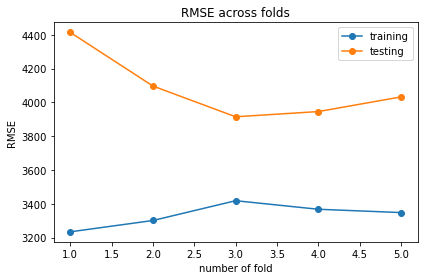

In [12]:
HGB_best = HistGradientBoostingRegressor(max_depth=140, max_iter=300, max_leaf_nodes=120, min_samples_leaf=40)

fit_check(HGB_best, 5)

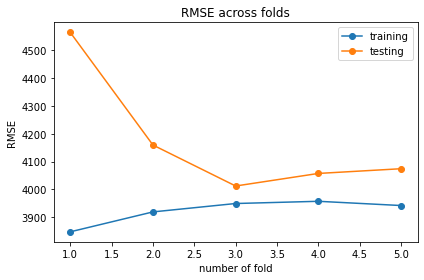

In [13]:
fit_check(HGB, 5)

The result from the HGB model is kind of trade off, the HGB with hyperparameter tuning got the better R2 but the worse overfitting case, and vice versa for the HGB default

## XGB Model

### overfitting and underfitting check

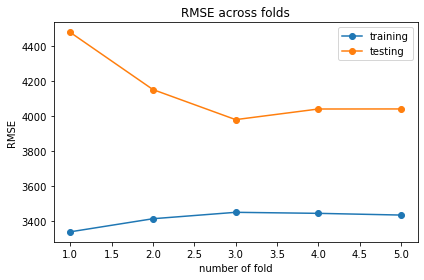

In [58]:
fit_check(XGB, 5)

,parameter,best_R2,best_value
0,n_estimators,0.790611,{'n_estimators': 140}


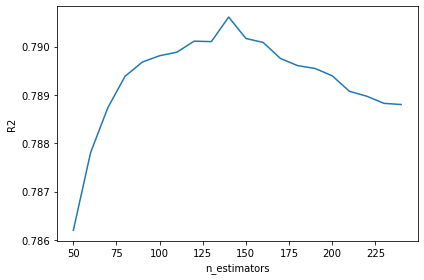

In [19]:
tuning_param(X_train, y_train, XGB, [{'n_estimators': np.arange(50, 250, 10)}])

,parameter,best_R2,best_value
0,max_depth,0.789811,{'max_depth': 6}


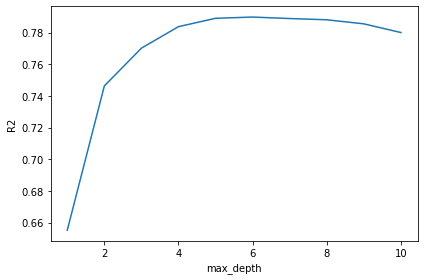

In [20]:
tuning_param(X_train, y_train, XGB, [{'max_depth': np.arange(1, 11, 1)}])

,parameter,best_R2,best_value
0,eta,0.792905,{'eta': 0.2}


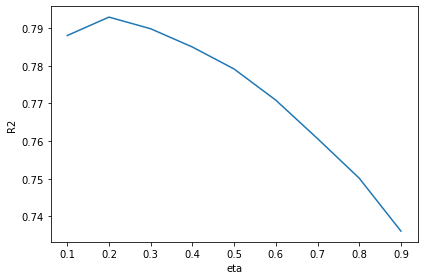

In [21]:
tuning_param(X_train, y_train, XGB, [{'eta': np.arange(0.1, 1, 0.1)}])

,parameter,best_R2,best_value
0,eta,0.794737,{'eta': 0.18999999999999995}


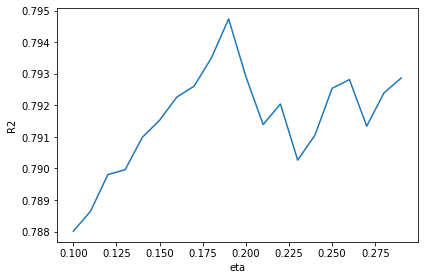

In [22]:
tuning_param(X_train, y_train, XGB, [{'eta': np.arange(0.1, 0.3, 0.01)}])

,parameter,best_R2,best_value
0,subsample,0.789811,{'subsample': 1.0}


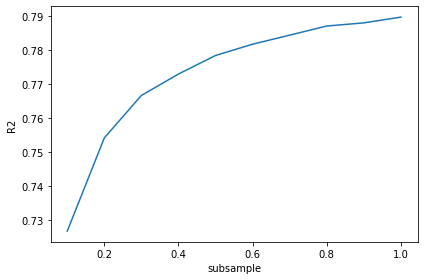

In [26]:
tuning_param(X_train, y_train, XGB, [{'subsample': np.arange(0.1, 1, 0.1)}])

,parameter,best_R2,best_value
0,colsample_bytree,0.79288,{'colsample_bytree': 0.8}


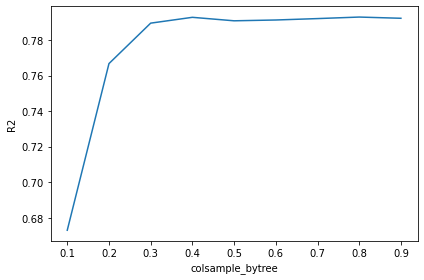

In [28]:
tuning_param(X_train, y_train, XGB, [{'colsample_bytree': np.arange(0.1, 1, 0.1)}])

In [29]:
parameters = {'n_estimators': np.arange(125, 175, 5), 'max_depth': np.arange(4, 9, 1), 'eta': np.arange(0.1, 0.4, 0.1), 
             'subsample': [1], 'colsample_bytree': [1]}

model_randomCV(X_train, y_train, XGB, parameters)

best_parameters: {'subsample': 1, 'n_estimators': 130, 'max_depth': 7, 'eta': 0.1, 'colsample_bytree': 1}
best_score: 0.7982015557528866
best_estimator: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=130, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_max_depth,param_eta,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,17.097398,0.194339,0.041201,0.012005,1,130,7,0.1,1,"{'subsample': 1, 'n_estimators': 130, 'max_dep...",0.800653,0.805448,0.795730,0.787812,0.801364,0.798202,0.006043,1
1,21.466599,0.512950,0.056604,0.010250,1,170,7,0.2,1,"{'subsample': 1, 'n_estimators': 170, 'max_dep...",0.800449,0.804237,0.794236,0.789679,0.801900,0.798100,0.005356,2
6,14.465797,0.157858,0.040201,0.012385,1,135,6,0.1,1,"{'subsample': 1, 'n_estimators': 135, 'max_dep...",0.795274,0.801062,0.787731,0.784450,0.797712,0.793246,0.006212,3
2,14.213198,0.172172,0.037202,0.008009,1,130,6,0.1,1,"{'subsample': 1, 'n_estimators': 130, 'max_dep...",0.795185,0.800207,0.787564,0.783429,0.796891,0.792655,0.006204,4
0,22.434799,0.904699,0.077000,0.018074,1,165,8,0.3,1,"{'subsample': 1, 'n_estimators': 165, 'max_dep...",0.790062,0.797720,0.786798,0.778342,0.793732,0.789331,0.006594,5
9,10.052598,0.741298,0.029801,0.006114,1,170,4,0.2,1,"{'subsample': 1, 'n_estimators': 170, 'max_dep...",0.787294,0.797076,0.785053,0.778492,0.790845,0.787752,0.006160,6
8,12.737200,0.231356,0.032801,0.002481,1,150,5,0.1,1,"{'subsample': 1, 'n_estimators': 150, 'max_dep...",0.789139,0.797104,0.783115,0.777152,0.789362,0.787174,0.006696,7
5,8.496199,0.122439,0.028803,0.004308,1,130,4,0.4,1,"{'subsample': 1, 'n_estimators': 130, 'max_dep...",0.785978,0.794458,0.781585,0.779154,0.790182,0.786272,0.005568,8
4,8.256799,0.079342,0.029001,0.002898,1,125,4,0.2,1,"{'subsample': 1, 'n_estimators': 125, 'max_dep...",0.783783,0.792692,0.781130,0.774586,0.786300,0.783698,0.005955,9
3,9.422198,0.167969,0.033402,0.006120,1,145,4,0.1,1,"{'subsample': 1, 'n_estimators': 145, 'max_dep...",0.776004,0.785434,0.772754,0.764013,0.779914,0.775624,0.007181,10


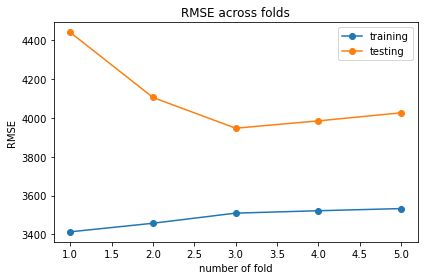

In [31]:
XGB_best = XGBRegressor(colsample_bytree=1, eta=0.1, learning_rate=0.100000001, max_depth=7,
                          n_estimators=130,)

fit_check(XGB_best, 5)

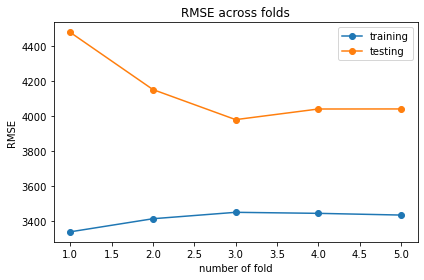

In [32]:
fit_check(XGB, 5)

### Final Recap

In [35]:
final = {'model' : ['RF', 'RF_best', 'HGB', 'HGB_best', 'XGB', 'XGB_best'], 
         'R2' : [0.775639, 0.7815388659752746, 0.793786, 0.8003662621122644, 0.799761, 0.7982015557528866], 
         'RMSE Difference' : ['around 3000', 'around 1000', 'around 100', 'around 600', 'around 600', 'around 600']}

pd.DataFrame(final)

,model,R2,RMSE Difference
0,RF,0.775639,around 3000
1,RF_best,0.781539,around 1000
2,HGB,0.793786,around 100
3,HGB_best,0.800366,around 600
4,XGB,0.799761,around 600
5,XGB_best,0.798202,around 600


so I think the best model is HGB with default parameters

### Final predicted model

In [42]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
def predicted_price(manufacturer, condition, cylinders, fuel, odometer, transmission, drive, size, type, age):
    
    x = np.zeros(10)
    x[0] = le['manufacturer'].transform([manufacturer])
    x[1] = le['condition'].transform([condition])
    x[2] = le['cylinders'].transform([cylinders])
    x[3] = le['fuel'].transform([fuel])
    x[4] = odometer
    x[5] = le['transmission'].transform([transmission])
    x[6] = le['drive'].transform([drive])
    x[7] = le['size'].transform([size])
    x[8] = le['type'].transform([type])
    x[9] = age
    
    
    return rf.predict([x])

In [60]:
predicted_price('ford', 'excellent', '4 cylinders', 'gas', 1000000.0 , 'automatic', 'rwd', 'mid-size', 'sedan', 14)

array([10361.58])

### save the model to pickle